# TP1 CORRECTION : introduction au langage python 
    cours: Master SIAD
    date: 18.10.2019
    @: vasseur.corentin@gmail.com

## Exercice 1

In [1]:
%%latex
MSE = $\frac{1}{n}\sum_{t=1}^{n}(y-\tilde{y})^2$

<IPython.core.display.Latex object>

In [2]:
%%bash
ls

TD1
TD1.zip
TP1-compte-rendu.ipynb
titanic
titanic.zip


## Exercice 2

## Exercice 3

In [3]:
import numpy as np

In [4]:
a = np.array([1,2,3])
b = np.array([4,5,6])

In [5]:
print(a+b, a-b)
print(a==b)
print(np.append(a,10), np.append(b,10))

[5 7 9] [-3 -3 -3]
[False False False]
[ 1  2  3 10] [ 4  5  6 10]


In [6]:
np.concatenate((a,b))

array([1, 2, 3, 4, 5, 6])

In [7]:
import matplotlib.pyplot as plt

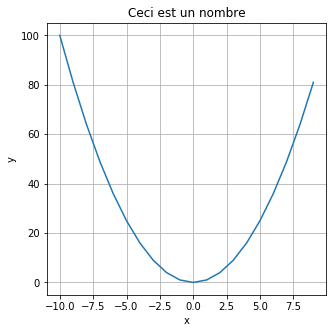

In [8]:
x = np.arange(-10,10)
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x,x**2)
ax.set_title('Ceci est un nombre')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

In [9]:
## exemple tqdm
from tqdm import tqdm
for i in tqdm(range(0,1000000)):
    i

100%|██████████| 1000000/1000000 [00:00<00:00, 3762328.49it/s]


## Exercice 4

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

### 1. Chargement des données (fichiers train.csv, test.csv)

In [14]:
train = pd.read_csv('../titanic/train.csv')
test = pd.read_csv('../titanic/test.csv')
train.shape,test.shape


((891, 12), (418, 11))

In [15]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

### 2. Valeurs manquantes

In [19]:
for i in train.columns:
    print(i, round((train.shape[0] - train[i].count())/train.shape[0]*100,3))

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.865
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.104
Embarked 0.224


### 3. Analyse unitaire

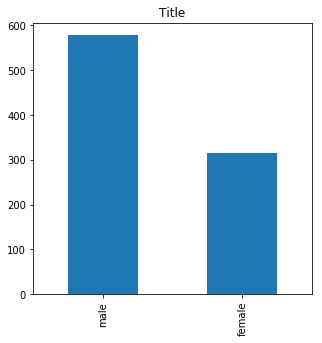

In [20]:
## variable qualitative
name = 'Sex'
ax = train[name].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Title")


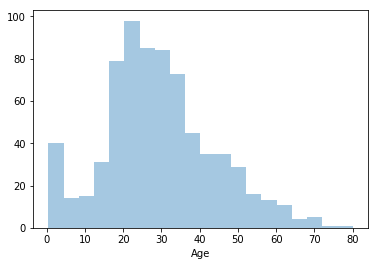

In [22]:
## variable quantitative
name = 'Age'
sns.distplot(train[name].dropna(), kde=False, rug=False)


In [23]:
# BONUS : exemple d'utilisation du package pandas profiling
#import pandas_profiling
#profile = train.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="output.html")

### 4. Analyse croisée

In [31]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
quantitative = ['Age','Fare', 'Survived' ,'SibSp','Parch']

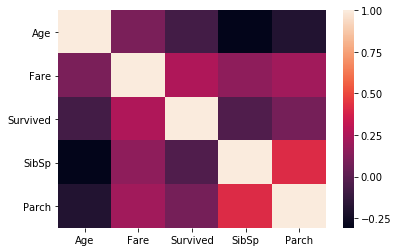

In [33]:
corr = train[quantitative].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [37]:
tmp_0 = train[train['Survived']==1]
tmp_1 = train[train['Survived']==0]

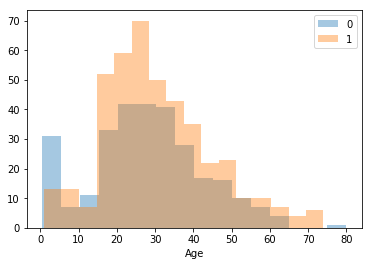

In [38]:
## variable quantitative : comparaison des distributions

name = 'Age'
sns.distplot(tmp_0[name].dropna(), kde=False, rug=False);

sns.distplot(tmp_1[name].dropna(), kde=False, rug=False);
plt.legend(['0', '1'])

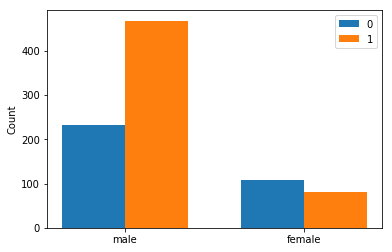

In [41]:
## variable qualitative 
name = 'Sex'

labels = train[name].value_counts().index

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tmp_0[name].value_counts().values, width, label='0')
rects2 = ax.bar(x + width/2, tmp_1[name].value_counts().values, width, label='1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()